In [42]:
# Mohammad Ali Zahir
# Student ID: 40077619
# COMP 333 - Data Analytics
# Objective: Write your own Python functions quantDDA() and vizDDA() within the notebook, and illustrate their use within the notebook.
# Output: Visualization of all the functions

## Step 1:  Quantitative Descriptions (6 marks)

In [43]:
# Import required librairies
import pandas as pd 
import numpy as np



In [44]:
import numpy as np
import pandas as pd

def quantDDA(filename:str):
    # Reading the filename to read the dataset
    df = pd.read_csv(filename)
    
    # Creating an empty dictionary to store the values in
    description_dict = {}

    # Loops through all the keys in the dataset and records their statistics one by one
    for key in df.columns:
        temp_dict = {}
        observations = df[key].shape[0]
        unique_entries = df[key].nunique()
        missing_entries = df[key].isna().sum()
        entries = observations - missing_entries
        mode = df.mode()[key].dropna().tolist()

        # Here we deal with non-numeric values. If the column contains a non-numeric value, we do not include it
        if df[key].dtype.kind in 'ifc' or df[key].dtype == np.bool_:
            mean = df.mean(numeric_only=True)[key]
            std = df.std(numeric_only=True)[key]
            max = df.max(numeric_only=True)[key]
            min = df.min(numeric_only=True)[key]
            q3 = df.quantile(0.75, numeric_only=True)[key]
            median = df.median(numeric_only=True)[key]
            q1 = df.quantile(0.25, numeric_only=True)[key]
            skewness = df.skew(numeric_only=True)[key]
            kurtosis = df.kurt(numeric_only=True)[key]
        else:
            mean = np.nan
            std = np.nan
            max = np.nan
            min = np.nan
            q3 = np.nan
            median = np.nan
            q1 = np.nan
            skewness = np.nan
            kurtosis = np.nan

        # Calculations done for the outliers and extreme values
        # Interquartile range
        IQR = q3 - q1

        # Formulas for the outliers and extreme values respectively
        outliers = ((df[key] < (q1 - 1.5 * IQR)) | (df[key] > (q3 + 1.5 * IQR))).sum()
        extreme_values = ((df[key] < (q1 - 3.0 * IQR)) | (df[key] > (q3 + 3.0 * IQR))).sum()

        # Adding everything to the dictionary and then converted to dataframe 
        temp_dict['Number of Observations'] = observations
        temp_dict['Number of Entries'] = entries
        temp_dict['Number of Unique Entries'] = unique_entries
        temp_dict['Number of Missing Entries'] = missing_entries
        temp_dict["Number of Outliers"] = outliers
        temp_dict["Number of Extreme Values"] = extreme_values
        temp_dict['Mode'] = mode
        temp_dict["Mean"] = mean
        temp_dict["Standard Deviation"] = std
        temp_dict["Maximum"] = max
        temp_dict["Minimum"] = min
        temp_dict["Q3"] = q3
        temp_dict["Median (or Q2)"] = median
        temp_dict["Q1"] = q1
        temp_dict["Skewness"] = skewness
        temp_dict["Kurtosis"] = kurtosis

        description_dict[key] = temp_dict

    updated_df = pd.DataFrame.from_dict(description_dict)
    return updated_df


In [45]:
# Trying with the week 2 restaurant dataset

quantDDA("./data/tips.csv")

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
Number of Observations,244,244,244,244,244,244,244,244
Number of Entries,244,244,244,244,244,244,244,244
Number of Unique Entries,244,229,123,2,2,4,2,6
Number of Missing Entries,0,0,0,0,0,0,0,0
Number of Outliers,0,9,9,0,0,0,0,9
Number of Extreme Values,0,0,2,0,0,0,0,0
Mode,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[13.42],[2.0],[Male],[No],[Sat],[Dinner],[2.0]
Mean,122.5,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
Standard Deviation,70.580923,8.902412,1.383638,NaN,NaN,NaN,NaN,0.9511
Maximum,244.0,50.81,10.0,NaN,NaN,NaN,NaN,6.0


In [46]:
# Trying to run the gender submission from the titanic dataset example from week 2

quantDDA("./data/gender_submission.csv")

,PassengerId,Survived
Number of Observations,418,418
Number of Entries,418,418
Number of Unique Entries,418,2
Number of Missing Entries,0,0
Number of Outliers,0,0
Number of Extreme Values,0,0
Mode,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ...",[0.0]
Mean,1100.5,0.363636
Standard Deviation,120.810458,0.481622
Maximum,1309,1


In [47]:
# Trying for the test data from the titanic dataset

quantDDA("./data/test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Number of Observations,418,418,418,418,418,418,418,418,418,418,418
Number of Entries,418,418,418,418,332,418,418,418,417,91,418
Number of Unique Entries,418,3,418,2,79,7,8,363,169,76,3
Number of Missing Entries,0,0,0,0,86,0,0,0,1,327,0
Number of Outliers,0,0,0,0,2,11,94,0,55,0,0
Number of Extreme Values,0,0,0,0,0,3,94,0,31,0,0
Mode,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ...",[3.0],"[Abbott, Master. Eugene Joseph, Abelseth, Miss...",[male],"[21.0, 24.0]",[0.0],[0.0],[PC 17608],[7.75],[B57 B59 B63 B66],[S]
Mean,1100.5,2.26555,NaN,NaN,30.27259,0.447368,0.392344,NaN,35.627188,NaN,NaN
Standard Deviation,120.810458,0.841838,NaN,NaN,14.181209,0.89676,0.981429,NaN,55.907576,NaN,NaN
Maximum,1309.0,3.0,NaN,NaN,76.0,8.0,9.0,NaN,512.3292,NaN,NaN


In [48]:
# Trying from the train data in the titanic dataset

quantDDA("./data/train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Number of Observations,891,891,891,891,891,891,891,891,891,891,891,891
Number of Entries,891,891,891,891,891,714,891,891,891,891,204,889
Number of Unique Entries,891,2,3,891,2,88,7,7,681,248,147,3
Number of Missing Entries,0,0,0,0,0,177,0,0,0,0,687,2
Number of Outliers,0,0,0,0,0,11,46,213,0,116,0,0
Number of Extreme Values,0,0,0,0,0,0,12,213,0,53,0,0
Mode,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[0.0],[3.0],"[Abbing, Mr. Anthony, Abbott, Mr. Rossmore Edw...",[male],[24.0],[0.0],[0.0],"[1601, 347082, CA. 2343]",[8.05],"[B96 B98, C23 C25 C27, G6]",[S]
Mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
Standard Deviation,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
Maximum,891.0,1.0,3.0,NaN,NaN,80.0,8.0,6.0,NaN,512.3292,NaN,NaN


# Step 2: Visual Descriptions (3 marks)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def vizDDA(filename:str):
    """
    This function takes in a pandas DataFrame `df` and produces a grid of plots.
    The grid is a square grid indexed by the features of the dataframe in both
    dimensions. Down the diagonal is a univariate plot for each feature; and each off-diagonal
    grid entry is a bivariate plot for the pair of features.
    """

    df = pd.read_csv(filename)
    # Calculate number of features in the DataFrame
    n = len(df.columns)

    # Create a square grid of subplots with `n` rows and `n` columns
    fig, ax = plt.subplots(nrows=n, ncols=n, figsize=(15, 15))

    # Create a heatmap of missing values in the dataset
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False, ax=ax[0, 0])
    ax[0, 0].set_title('Missing Values')

    # Create univariate and bivariate plots for each feature
    for i in range(n):
        for j in range(n):
            if i == j:
                # Univariate plot
                if df[df.columns[i]].dtype.name == 'object':
                    sns.countplot(df.iloc[:, i], ax=ax[i, j])
                elif df[df.columns[i]].dtype.name == 'category':
                    sns.countplot(df.iloc[:, i], ax=ax[i, j])
                else:
                    sns.histplot(df.iloc[:, i], kde=True, ax=ax[i, j])
            else:
                # Bivariate plot
                if df[df.columns[i]].dtype == 'object' or df[df.columns[j]].dtype == 'object':
                    sns.scatterplot(data=df, x=df.columns[j], y=df.columns[i], ax=ax[i, j])
                elif df[df.columns[i]].dtype.name == 'category' or df[df.columns[j]].dtype.name == 'category':
                    sns.stripplot(data=df, x=df.columns[j], y=df.columns[i], jitter=True, ax=ax[i, j])
                else:
                    sns.scatterplot(data=df, x=df.columns[j], y=df.columns[i], hue=df.columns[j], ax=ax[i, j])

    # Label the x and y axes of the plots along the diagonal
    for i in range(n):
        ax[i, i].set_xlabel(df.columns[i])
        ax[i, i].set_ylabel('')

    # Remove the x and y ticks of the plots in the upper triangle
    for i in range(n):
        for j in range(i+1, n):
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])

    # Adjust the space between subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Show the plot
    plt.show()


ValueError: could not convert string to float: 'Female'

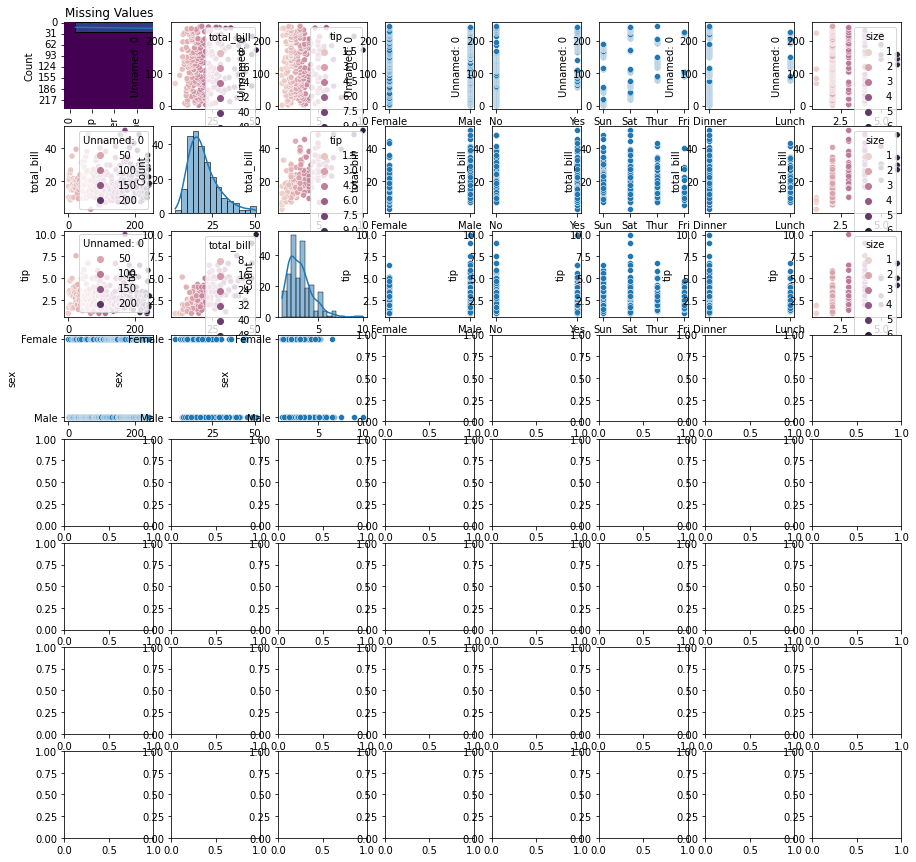

In [50]:
vizDDA('./data/tips.csv')